Task :
- Melihat sebarapa Akurat Penyebaran Dosis vaksinasi diwilayah dki jakarta bagian selatan. 
- Batasan : Kategori Tenaga Kesehatan, dengan data Dosis 1 dan Dosis 2. serta menggunakan Metode Regressi Linier

Asumsi :
Efektifitas Pensaluran Vaksin Di daerah Jakarta Selatan


# **Import library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# **Pre Processing Data**

In [ ]:
# import file from github
url = 'https://raw.githubusercontent.com/xaveriouzs/ML-vaccine-linear-regression/main/Dataset%20Vaksinasi%20jakarta.csv'
vaksin_df = pd.read_csv(url)

In [ ]:
# show first five and last five of the data
vaksin_df

,tanggal,kode_kelurahan,wilayah_kota,kecamatan,kelurahan,penerima_vaksinasi,vaksin_dosis_1,vaksin_dosis_2,jumlah_vaksin
0,7/1/2021,3171071002,JAKARTA PUSAT,TANAH ABANG,BENDUNGAN HILIR,TENAGA KESEHATAN,250,217,467
1,7/1/2021,3171041006,JAKARTA PUSAT,SENEN,BUNGUR,TENAGA KESEHATAN,133,123,256
2,7/1/2021,3171031006,JAKARTA PUSAT,KEMAYORAN,CEMPAKA BARU,TENAGA KESEHATAN,272,231,503
3,7/1/2021,3171051002,JAKARTA PUSAT,CEMPAKA PUTIH,CEMPAKA PUTIH BARAT,TENAGA KESEHATAN,334,299,633
4,7/1/2021,3171051001,JAKARTA PUSAT,CEMPAKA PUTIH,CEMPAKA PUTIH TIMUR,TENAGA KESEHATAN,350,322,672
...,...,...,...,...,...,...,...,...,...
8005,7/31/2021,3101011002,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTARA,PULAU KELAPA,TENAGA KESEHATAN,54,51,105
8006,7/31/2021,3101011001,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTARA,PULAU PANGGANG,TENAGA KESEHATAN,130,120,250
8007,7/31/2021,3101021003,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU PARI,TENAGA KESEHATAN,31,29,60
8008,7/31/2021,3101021002,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,TENAGA KESEHATAN,81,75,156


In [ ]:
vaksin_df['tanggal'] = pd.to_datetime(vaksin_df['tanggal'])
print(vaksin_df['tanggal'])

0      2021-07-01
1      2021-07-01
2      2021-07-01
3      2021-07-01
4      2021-07-01
          ...    
8005   2021-07-31
8006   2021-07-31
8007   2021-07-31
8008   2021-07-31
8009   2021-07-31
Name: tanggal, Length: 8010, dtype: datetime64[ns]


In [ ]:
# filter daerah jaksel
vaksin_df.loc[vaksin_df['wilayah_kota'] == 'JAKARTA SELATAN']

,tanggal,kode_kelurahan,wilayah_kota,kecamatan,kelurahan,penerima_vaksinasi,vaksin_dosis_1,vaksin_dosis_2,jumlah_vaksin
3930,2021-07-01,3174031002,JAKARTA SELATAN,MAMPANG PRAPATAN,BANGKA,TENAGA KESEHATAN,143,127,270
3931,2021-07-01,3174101002,JAKARTA SELATAN,PESANGGRAHAN,BINTARO,TENAGA KESEHATAN,494,430,924
3932,2021-07-01,3174011005,JAKARTA SELATAN,TEBET,BUKIT DURI,TENAGA KESEHATAN,239,210,449
3933,2021-07-01,3174091003,JAKARTA SELATAN,JAGAKARSA,CIGANJUR,TENAGA KESEHATAN,404,362,766
3934,2021-07-01,3174081006,JAKARTA SELATAN,PANCORAN,CIKOKO,TENAGA KESEHATAN,117,101,218
...,...,...,...,...,...,...,...,...,...
5875,2021-07-31,3174091005,JAKARTA SELATAN,JAGAKARSA,TANJUNG BARAT,TENAGA KESEHATAN,380,336,716
5876,2021-07-31,3174011002,JAKARTA SELATAN,TEBET,TEBET BARAT,TENAGA KESEHATAN,284,252,536
5877,2021-07-31,3174011001,JAKARTA SELATAN,TEBET,TEBET TIMUR,TENAGA KESEHATAN,240,222,462
5878,2021-07-31,3174031004,JAKARTA SELATAN,MAMPANG PRAPATAN,TEGAL PARANG,TENAGA KESEHATAN,222,190,412


In [ ]:
groups = vaksin_df.groupby('wilayah_kota')
jaksel = groups.get_group('JAKARTA SELATAN')
jaksel

,tanggal,kode_kelurahan,wilayah_kota,kecamatan,kelurahan,penerima_vaksinasi,vaksin_dosis_1,vaksin_dosis_2,jumlah_vaksin
3930,2021-07-01,3174031002,JAKARTA SELATAN,MAMPANG PRAPATAN,BANGKA,TENAGA KESEHATAN,143,127,270
3931,2021-07-01,3174101002,JAKARTA SELATAN,PESANGGRAHAN,BINTARO,TENAGA KESEHATAN,494,430,924
3932,2021-07-01,3174011005,JAKARTA SELATAN,TEBET,BUKIT DURI,TENAGA KESEHATAN,239,210,449
3933,2021-07-01,3174091003,JAKARTA SELATAN,JAGAKARSA,CIGANJUR,TENAGA KESEHATAN,404,362,766
3934,2021-07-01,3174081006,JAKARTA SELATAN,PANCORAN,CIKOKO,TENAGA KESEHATAN,117,101,218
...,...,...,...,...,...,...,...,...,...
5875,2021-07-31,3174091005,JAKARTA SELATAN,JAGAKARSA,TANJUNG BARAT,TENAGA KESEHATAN,380,336,716
5876,2021-07-31,3174011002,JAKARTA SELATAN,TEBET,TEBET BARAT,TENAGA KESEHATAN,284,252,536
5877,2021-07-31,3174011001,JAKARTA SELATAN,TEBET,TEBET TIMUR,TENAGA KESEHATAN,240,222,462
5878,2021-07-31,3174031004,JAKARTA SELATAN,MAMPANG PRAPATAN,TEGAL PARANG,TENAGA KESEHATAN,222,190,412


In [ ]:
# drop kolom kelurahan dan kode_kelurahan
jaksel.drop(columns=['kelurahan','kode_kelurahan'],axis= 1, inplace=True)

In [ ]:
jaksel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 3930 to 5879
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tanggal             1950 non-null   datetime64[ns]
 1   wilayah_kota        1950 non-null   object        
 2   kecamatan           1950 non-null   object        
 3   penerima_vaksinasi  1950 non-null   object        
 4   vaksin_dosis_1      1950 non-null   int64         
 5   vaksin_dosis_2      1950 non-null   int64         
 6   jumlah_vaksin       1950 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 121.9+ KB


#**Linier regression**

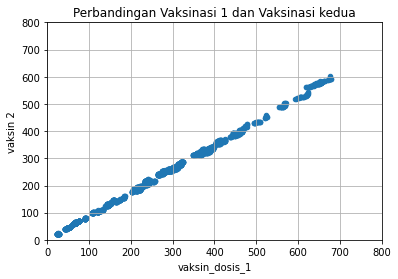

In [ ]:
#####
import matplotlib.pyplot as plt

jaksel.plot(kind='scatter', x='vaksin_dosis_1', y='vaksin_dosis_2')

plt.title('Perbandingan Vaksinasi 1 dan Vaksinasi kedua')
plt.xlabel=('Vaksin 1')
plt.ylabel('vaksin 2')
plt.xlim(0, 800)
plt.ylim(0, 800)
plt.grid(True)
plt.show()

Nilai slope

In [ ]:
column_names = ['vaksin_dosis_1','jumlah_vaksin']
column_names2 = ['vaksin_dosis_2','jumlah_vaksin']
x = np.array(jaksel[column_names])
y = np.array(jaksel[column_names2])

print(f'x:{x}')
print(f'y:{y}')

x:[[143 270]
 [494 924]
 [239 449]
 ...
 [240 462]
 [222 412]
 [295 557]]
y:[[127 270]
 [430 924]
 [210 449]
 ...
 [222 462]
 [190 412]
 [262 557]]


In [ ]:
x = x.reshape(-1,1)
x.shape

(3900, 1)

In [ ]:
y = y.reshape(-1,1)
y.shape

(3900, 1)

## Training Simple Linear Regression Model


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
x_vis = np.array([0,800]).reshape(-1,1)
y_vis = model.predict(x_vis)

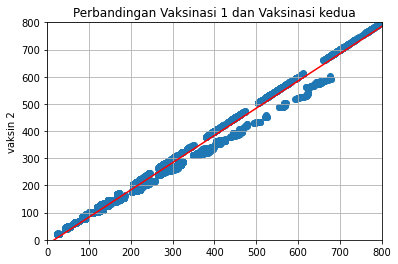

In [ ]:
#####

plt.scatter(x,y)
plt.plot(x_vis, y_vis, '-r')

plt.title('Perbandingan Vaksinasi 1 dan Vaksinasi kedua')
plt.xlabel=('Vaksin 1')
plt.ylabel('vaksin 2')
plt.xlim(0, 800)
plt.ylim(0, 800)
plt.grid(True)
plt.show()

In [ ]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: [-17.16788336]
slope: [[1.00296545]]


In [ ]:
variance_x = np.var(x.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 71863.34621632106


Menari nilai Slope pada Linier Regression bisa diperoleh dengan menggunakan formula Betac = Covariance(x,y)/variance(x)

In [ ]:
print(f'x:\n{x}\n')
print(f'x flatten: {x.flatten()}\n')
print(f'y: \n{y}\n')
print(f'y flatten: {y.flatten()}\n')

x:
[[143]
 [270]
 [494]
 ...
 [412]
 [295]
 [557]]

x flatten: [143 270 494 ... 412 295 557]

y: 
[[127]
 [270]
 [430]
 ...
 [412]
 [262]
 [557]]

y flatten: [127 270 430 ... 412 262 557]



In [ ]:
variance_x = np.var(x.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 71863.34621632106


In [ ]:
np.cov(x.flatten(), y.flatten())

array([[71863.34621632, 72076.45305174],
       [72076.45305174, 72765.88361743]])

In [ ]:
covariance_xy = np.cov(x.flatten(), y.flatten())[0][1]

print(f'covariance: {covariance_xy}')

covariance: 72076.4530517358


In [ ]:
#Slope
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 1.0029654454827814


Mencari Nilai Intercept

In [ ]:
intercept = np.mean(y) - slope * np.mean(x)

print(f'intercept: {intercept}')

intercept: -17.167883356050936


Linier Regression Data Accuracy


In [ ]:
jaksel_vaksin = np.array(x.flatten()).reshape(-1, 1)
jaksel_vaksin

array([[143],
       [270],
       [494],
       ...,
       [412],
       [295],
       [557]])

In [ ]:
efektifitas_persebaran = model.predict(jaksel_vaksin)
efektifitas_persebaran

array([[126.25617535],
       [253.63278692],
       [478.29704671],
       ...,
       [396.05388018],
       [278.70692306],
       [541.48386978]])

Melakukan evaluasi R Squared


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
x_train.shape,x_test.shape, y_train.shape, y_test.shape

model_scores=[]
print(x_train)

[[265]
 [217]
 [367]
 ...
 [507]
 [782]
 [525]]


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from  sklearn.metrics import r2_score

y_pred = model.predict(x_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.9932408109223076


Mencari Nilai R-squared untuk melihat Nilai error dan selisih nilai dari testing set dengan rata - ratanya.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
#Melakukan Proses Regresi linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear regression
reg = LinearRegression()
regmodel = reg.fit(x_train, y_train)

coef = reg.coef_

y_predtrain = regmodel.predict(x_train)

y_predtest = regmodel.predict(x_test)

In [ ]:
#Menghitung data akurasi dengan menggunakan squareregresion untuk melihat score train pada akurasi yang ditampilkan 
RMSEtrain = mean_squared_error(y_train, y_predtrain, squared=False)
RMSEtest = mean_squared_error(y_test, y_predtest, squared=False)
r2_train = r2_score(y_train, y_predtrain)
r2_test = r2_score(y_test, y_predtest)
print("RMSE for the training data is: ", RMSEtrain)
print("RMSE for the testing data is: ", RMSEtest)
print("R^2 value for training data is: ", r2_train)
print("R^2 value for testing data is: ", r2_test)

RMSE for the training data is:  21.725080743203375
RMSE for the testing data is:  22.136836857471774
R^2 value for training data is:  0.9935165286951987
R^2 value for testing data is:  0.9932408109223076


In [ ]:
regmodel.score(x_test, y_test)

0.9932408109223076

Regression dengan KNN (K Nearest Neighbours)

In [ ]:
print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[-0.4081018 ]
 [-0.58711469]
 [-0.02769942]
 ...
 [ 0.49442149]
 [ 1.52001614]
 [ 0.56155132]]

y_train: [[265]
 [194]
 [314]
 ...
 [507]
 [782]
 [453]]


-------- P


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

K = 3
model = KNeighborsRegressor(n_neighbors=K)
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

Evaluasi Nilai dari dataset sebelumnya menggunakan KNN Regression Model 

In [ ]:
x_new = np.array(jaksel[['vaksin_dosis_2']])
x_new

array([[127],
       [430],
       [210],
       ...,
       [222],
       [190],
       [262]])

In [ ]:
y_pred = model.predict(x_new)
y_pred

array([[1275.33333333],
       [1275.33333333],
       [1275.33333333],
       ...,
       [1275.33333333],
       [1275.33333333],
       [1275.33333333]])

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[ 273.        ],
       [ 329.66666667],
       [ 505.        ],
       [ 705.        ],
       [ 211.        ],
       [ 699.        ],
       [ 193.33333333],
       [ 111.        ],
       [ 246.        ],
       [ 704.        ],
       [ 404.33333333],
       [ 279.        ],
       [ 410.66666667],
       [ 318.        ],
       [1220.        ],
       [1224.        ],
       [ 978.        ],
       [ 184.66666667],
       [ 262.33333333],
       [  43.33333333],
       [  21.        ],
       [  89.        ],
       [ 545.        ],
       [ 562.        ],
       [  58.        ],
       [ 155.        ],
       [  49.        ],
       [ 324.33333333],
       [ 786.        ],
       [ 304.        ],
       [ 193.66666667],
       [ 423.        ],
       [ 214.33333333],
       [ 257.33333333],
       [ 275.        ],
       [ 184.        ],
       [ 770.33333333],
       [ 776.66666667],
       [  43.33333333],
       [1135.        ],
       [  43.        ],
       [ 131.   

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.9959166616588943


KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Test set: \n{} \n{}\n".format(x_test, y_test))
print("test set prediction: {}".format(clf.predict(x_test)))

Test set: 
[[-3.78266322e-01]
 [-1.27816825e-02]
 [ 4.86962620e-01]
 [ 1.23284964e+00]
 [-4.97608245e-01]
 [ 1.20674359e+00]
 [-6.02032428e-01]
 [-9.00387235e-01]
 [-3.67078017e-01]
 [ 1.22912020e+00]
 [ 2.74384820e-01]
 [-2.55194964e-01]
 [ 3.04220301e-01]
 [-5.75349037e-02]
 [ 3.14977928e+00]
 [ 3.16842645e+00]
 [ 2.26217373e+00]
 [-6.20679603e-01]
 [-2.81301009e-01]
 [-1.22857752e+00]
 [-1.30689566e+00]
 [-1.06448238e+00]
 [ 6.36140024e-01]
 [ 6.99540421e-01]
 [-1.16144769e+00]
 [-7.51209832e-01]
 [-1.19501261e+00]
 [-1.65111176e-02]
 [ 1.53493388e+00]
 [-2.62653834e-01]
 [-5.53549771e-01]
 [ 3.34055781e-01]
 [-4.78961070e-01]
 [-4.08101803e-01]
 [-3.70807452e-01]
 [-6.05761863e-01]
 [ 1.47526292e+00]
 [ 1.49763953e+00]
 [-1.22857752e+00]
 [ 2.84769504e+00]
 [-1.22111865e+00]
 [-8.40716274e-01]
 [-3.81995757e-01]
 [ 1.04264845e+00]
 [ 5.72739628e-01]
 [-5.05067115e-01]
 [ 1.74378225e+00]
 [-3.85725192e-01]
 [-1.95524002e-01]
 [-3.52160276e-01]
 [ 1.13588433e+00]
 [ 3.00490866e-01]
 

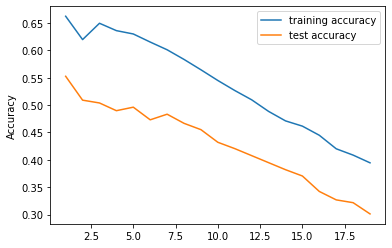

In [ ]:
# Memmvisualisasikan hasil data Akurasi yang ada pada Dataset yang baru saja 
# diproses, dan dilihat lajur Line yang ada
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
jaksel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 3930 to 5879
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tanggal             1950 non-null   datetime64[ns]
 1   wilayah_kota        1950 non-null   object        
 2   kecamatan           1950 non-null   object        
 3   penerima_vaksinasi  1950 non-null   object        
 4   vaksin_dosis_1      1950 non-null   int64         
 5   vaksin_dosis_2      1950 non-null   int64         
 6   jumlah_vaksin       1950 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 121.9+ KB


In [ ]:
pip install pystan==2.19.1.1

In [ ]:
! pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
#Grouping different types of cases as per the date
datewise=jaksel.groupby(["tanggal"]).agg({"jumlah_vaksin":'sum'})
datewise["Perkembangan"]=datewise.index-datewise.index.min()

In [ ]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_vaksin=pd.DataFrame(zip(list(datewise.index),list(datewise["jumlah_vaksin"])),columns=['ds','y'])

In [ ]:
prophet_c.fit(prophet_vaksin)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
forecast_c=prophet_c.make_future_dataframe(periods=14)
forecast_vaksin=forecast_c.copy()

In [ ]:
vaksin_forecast=prophet_c.predict(forecast_vaksin)

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(datewise["jumlah_vaksin"],
vaksin_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error
(datewise["jumlah_vaksin"],vaksin_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  4.200776087161108e-12


Figure(720x432)


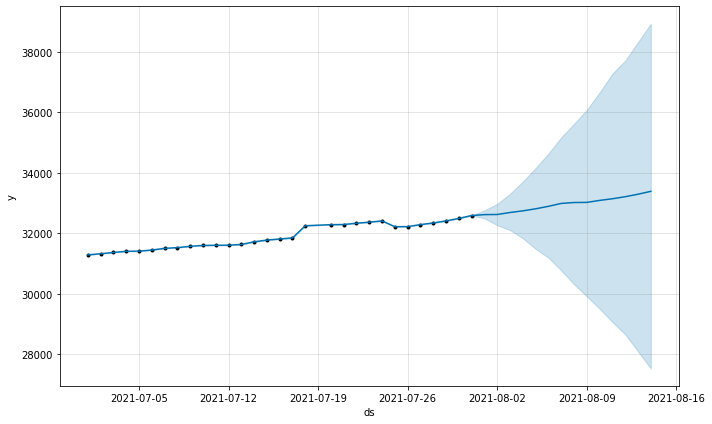

In [ ]:
print(prophet_c.plot(vaksin_forecast))

Figure(648x432)


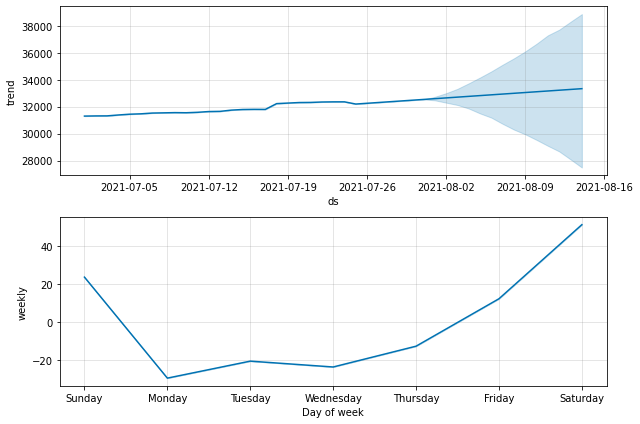

In [ ]:
print(prophet_c.plot_components(vaksin_forecast))